施設のブロック生成

In [1]:
import pickle
from ifloat.util.geometry import Shape2D, Polygon, Pose3D
from ifloat.domain.factory_models import Area, Facility, AccessPoint
from ifloat.usecase.usecase_io_data import RouteInputData
from ifloat.infra.visualizer import visualize_facilities

任意の小マップを生成する (施設の大きさ、アクセスポイントを定義する)

In [18]:
f1 = Facility("f1")
f1.shape = Shape2D(
    [
        Polygon().from_rect(1, 0.0, 1, 1.5),
        Polygon().from_rect(0, 0, 2, 1),
    ]
)
f1.access_points = [
    
]

f2 = Facility("f2")
f2.shape = Shape2D(
    [
        Polygon().from_rect(0, 0.0, 1, 3),
        Polygon().from_rect(0, 0, 2, 1),
    ]
)
f2.access_points = [
    AccessPoint("store_a", Pose3D(1.5, 1.5, 0)),
    
]


f3 = Facility("f3")
f3.shape = Shape2D([
    Polygon().from_rect(0, 0, 2, 2),
    ])
f3.access_points = [
]

f4 = Facility("f4")
f4.shape = Shape2D([
    Polygon().from_rect(0, 0, 3, 1),
    ])
f4.access_points = [
    AccessPoint("assy_a_in", Pose3D(3.5, 0.5, 0)),
]
f5 = Facility("f5")
f5.shape = Shape2D([
    Polygon().from_rect(1, 0, 1, 2),
    Polygon().from_rect(0, 0.0, 1, 3),
    Polygon().from_rect(0, 0, 3, 1),
])
f5.access_points = [
    AccessPoint("part_a_in", Pose3D(2.5, 1.5, 0.0)),
    AccessPoint("assy_a_out", Pose3D(1.5, 2.5, 0.0)),

]

f6 = Facility("f6")
f6.shape = Shape2D([
    Polygon().from_rect(0, 0, 3, 3),
])
f6.access_points = [
    
]

# f7 = Facility("f7")
# f7.shape = Shape2D([
#     Polygon().from_rect(0, 0, 2, 4),
#     Polygon().from_rect(4, 0, 2, 4),
#     Polygon().from_rect(0, 0, 6, 2),
# ])
# f7.access_points = [
    
# ]
# f6 = Facility("f6")
# f6.shape = Shape2D([
#     Polygon().from_rect(0, 0, 2.0, 4.0),
#     Polygon().from_rect(4.0, 0, 2.0, 4.0),
#     Polygon().from_rect(4.0, 0, 2.0, 4.0),
#     Polygon().from_rect(0, 2.0, 4.0, 2.0),
# ])
# f6.access_points = [
# ]


# f8 = Facility("f8")
# f8.shape = Shape2D([
#     Polygon().from_rect(0, 0, 4, 3),
#     Polygon().from_rect(4, 0, 2, 4),
# ])
# f8.access_points = [
# ]
# f9 = Facility("f9")
# f9.shape = Shape2D(
#     [
#         Polygon().from_rect(-1.5, -3, 2.0, 3.0),
#         Polygon().from_rect(-3, -1.5, 6.0, 2.0),
#     ]
# )
# f10 = Facility("f1")
# f10.shape = Shape2D(
#     [
#         Polygon().from_rect(0.0, 0.0, 2.0, 4.0),
#         Polygon().from_rect(0.0, 0.0, 6.0, 2.0),
#     ]
# )
# f1.access_points = [
# ]

facilities = [f1, f2, f3,f4,f5,f6]
# facilitiesに格納

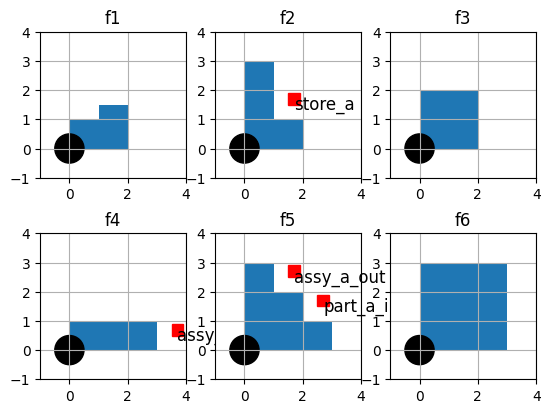

In [19]:
visualize_facilities(facilities)

In [20]:
area = Area("area")
area.shape = Shape2D([Polygon().from_rect(0, 0, 9, 9)])

In [21]:
routes = [
    RouteInputData(["store_a", "part_a_in"], 60.0),

   
    RouteInputData(["assy_a_out", "assy_a_in"], 60.0),
    
]

生成した施設のデータをlayout_testにバイナリーとしてtest_dataに保存

In [22]:
with open("../data_set/layout_set/9layout/layout_set.pkl", "wb") as f:
    pickle.dump((facilities, area, routes), f)

マップ生成

In [2]:
from ifloat.usecase.generator import EvolutionalFacilityPoseGenerator
from ifloat.infra.visualizer import visualize_floor

In [3]:
with open("../data_set/layout_set/9layout/layout_set.pkl", "rb") as f:
    facilities, area, routes = pickle.load(f)

layout_testから障害物を読み込み、GAによってマップを生成する 生成マップをfacilities_testに保存する

訓練データの生成

In [ ]:
generator = EvolutionalFacilityPoseGenerator(area, facilities)

facility_set = []

N_DATASET = 50000
N_ONE_FILE = 500
N_FILE = int(N_DATASET / N_ONE_FILE)

for file_no in range(N_FILE):
    file_name = f"../data_set/training/18map/facilities_test_{file_no}.pkl"

    try:
        for i in range(N_ONE_FILE):
            facilities_data = None

            while not facilities_data:
                facilities_data = generator.generate(max_iter=100)
            
            print(f"{file_name} #{i + 1:04}/{N_ONE_FILE:04}")

            facility_set.append(facilities_data)
    # except:
    #     pass

    finally:
        with open(file_name, "wb") as f:
            pickle.dump(facility_set, f)
            facility_set.clear()

../data_set/training/18map/facilities_test_0.pkl #0001/5000
../data_set/training/18map/facilities_test_0.pkl #0002/5000
../data_set/training/18map/facilities_test_0.pkl #0003/5000
../data_set/training/18map/facilities_test_0.pkl #0004/5000
../data_set/training/18map/facilities_test_0.pkl #0005/5000
../data_set/training/18map/facilities_test_0.pkl #0006/5000
../data_set/training/18map/facilities_test_0.pkl #0007/5000
../data_set/training/18map/facilities_test_0.pkl #0008/5000
../data_set/training/18map/facilities_test_0.pkl #0009/5000
../data_set/training/18map/facilities_test_0.pkl #0010/5000
../data_set/training/18map/facilities_test_0.pkl #0011/5000
../data_set/training/18map/facilities_test_0.pkl #0012/5000
../data_set/training/18map/facilities_test_0.pkl #0013/5000
../data_set/training/18map/facilities_test_0.pkl #0014/5000
../data_set/training/18map/facilities_test_0.pkl #0015/5000
../data_set/training/18map/facilities_test_0.pkl #0016/5000
../data_set/training/18map/facilities_te

In [ ]:
with open("../data_set/training/9map/facilities_test_0.pkl", "rb") as f:
    facility_dataset = pickle.load(f)



for facilities in facility_dataset:
    visualize_floor(facilities)
# 作成したマップの表示

テストデータの生成

In [ ]:
generator = EvolutionalFacilityPoseGenerator(area, facilities)

facility_set = []

N_DATASET = 3000
N_ONE_FILE = 1000
N_FILE = int(N_DATASET / N_ONE_FILE)

for file_no in range(N_FILE):
    file_name = f"../data_set/test/9map/facilities_test_{file_no}.pkl"

    try:
        for i in range(N_ONE_FILE):
            facilities_data = None

            while not facilities_data:
                facilities_data = generator.generate(max_iter=100)
            
            print(f"{file_name} #{i + 1:04}/{N_ONE_FILE:04}")

            facility_set.append(facilities_data)
    # except:
    #     pass

    finally:
        with open(file_name, "wb") as f:
            pickle.dump(facility_set, f)
            facility_set.clear()

c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


../data_set/test/9map/facilities_test_0.pkl.pkl #0001/1000


c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


../data_set/test/9map/facilities_test_0.pkl.pkl #0002/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0003/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0004/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0005/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0006/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0007/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0008/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0009/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0010/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0011/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0012/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0013/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0014/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0015/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0016/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0017/1000
../data_set/test/9map/facilities_test_0.pkl.pkl #0018/10

In [12]:
with open("data_set/training/facilities_test_0001.pkl", "rb") as f:
    test_facility_dataset = pickle.load(f)



# for facilities in test_facility_dataset:
#     visualize_floor(facilities)
# 作成したマップの表示

検証データの作成

In [ ]:
generator = EvolutionalFacilityPoseGenerator(area, facilities)

V_facility_set = []

V_DATASET = 3000
V_ONE_FILE = 1000
V_FILE = int(V_DATASET / V_ONE_FILE)

for file_no in range(V_FILE):
    file_name = f"data_set/valid/facilities_test_{file_no + 1:04}.pkl"

    try:
        for i in range(V_ONE_FILE):
            facilities_data = None

            while not facilities_data:
                facilities_data = generator.generate(max_iter=100)
            
            print(f"{file_name} #{i + 1:04}/{V_ONE_FILE:04}")

            V_facility_set.append(facilities_data)
    # except:
    #     pass

    finally:
        with open(file_name, "wb") as f:
            pickle.dump(V_facility_set, f)
            V_facility_set.clear()

c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


data_set/valid/facilities_test_0001.pkl #0001/3000


c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\mochizuki\research\ifloat\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


data_set/valid/facilities_test_0001.pkl #0002/3000
data_set/valid/facilities_test_0001.pkl #0003/3000
data_set/valid/facilities_test_0001.pkl #0004/3000
data_set/valid/facilities_test_0001.pkl #0005/3000
data_set/valid/facilities_test_0001.pkl #0006/3000
data_set/valid/facilities_test_0001.pkl #0007/3000
data_set/valid/facilities_test_0001.pkl #0008/3000
data_set/valid/facilities_test_0001.pkl #0009/3000
data_set/valid/facilities_test_0001.pkl #0010/3000
data_set/valid/facilities_test_0001.pkl #0011/3000
data_set/valid/facilities_test_0001.pkl #0012/3000
data_set/valid/facilities_test_0001.pkl #0013/3000
data_set/valid/facilities_test_0001.pkl #0014/3000
data_set/valid/facilities_test_0001.pkl #0015/3000
data_set/valid/facilities_test_0001.pkl #0016/3000
data_set/valid/facilities_test_0001.pkl #0017/3000
data_set/valid/facilities_test_0001.pkl #0018/3000
data_set/valid/facilities_test_0001.pkl #0019/3000
data_set/valid/facilities_test_0001.pkl #0020/3000
data_set/valid/facilities_test_

In [15]:
with open("data_set/valid/facilities_test_0001.pkl", "rb") as f:
    V_facility_dataset = pickle.load(f)